In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.1 MB/s 


# CHÈN THƯ VIỆN

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from PIL import Image

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# TIỀN XỬ LÍ DỮ LIỆU VÀ CHUẨN HÓA BỘ DỮ LIỆU

In [ ]:
data_train='/content/drive/MyDrive/emotion/train'
data_validation='/content/drive/MyDrive/emotion/validation'
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
traindata=train.flow_from_directory(data_train,
                                    target_size=(48,48),color_mode="grayscale",
                                    batch_size=10,
                                    class_mode='categorical',shuffle=True)
validationdata=validation.flow_from_directory(data_validation,
                                              target_size=(48,48),color_mode="grayscale",
                                              batch_size=10,
                                              class_mode='categorical',shuffle=False)

Found 25738 images belonging to 6 classes.
Found 6955 images belonging to 6 classes.


In [ ]:
print(traindata.class_indices)
print(validationdata.class_indices)

{'angry': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}
{'angry': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}


# XÂY DỰNG MODEL


In [ ]:
model=Sequential()
# 1st layer
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
# 2nd layer

model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
# 3 layer
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
# 4 layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_16 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_17 (Bat  (None, 24, 24, 128)     

# TIẾN HÀNH HUẤN LUYỆN

In [ ]:
opt = Adam(lr = 0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history=model.fit(traindata,batch_size=10,epochs=15,verbose=1,validation_data=validationdata)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2574/2574 [==============================] - 810s 314ms/step - loss: 1.6599 - accuracy: 0.3218 - val_loss: 1.4958 - val_accuracy: 0.4198
Epoch 2/15
2574/2574 [==============================] - 758s 295ms/step - loss: 1.4392 - accuracy: 0.4280 - val_loss: 1.3221 - val_accuracy: 0.4835
Epoch 3/15
2574/2574 [==============================] - 749s 291ms/step - loss: 1.3339 - accuracy: 0.4726 - val_loss: 1.3109 - val_accuracy: 0.4896
Epoch 4/15
2574/2574 [==============================] - 756s 294ms/step - loss: 1.2571 - accuracy: 0.5119 - val_loss: 1.2453 - val_accuracy: 0.5165
Epoch 5/15
2574/2574 [==============================] - 749s 291ms/step - loss: 1.2029 - accuracy: 0.5338 - val_loss: 1.1772 - val_accuracy: 0.5498
Epoch 6/15
2574/2574 [==============================] - 754s 293ms/step - loss: 1.1550 - accuracy: 0.5563 - val_loss: 1.1549 - val_accuracy: 0.5605
Epoch 7/15
2574/2574 [==============================] - 746s 290ms/step - loss: 1.1133 - accuracy: 0.5694 - val_loss: 1.142

## LƯU MODEL ĐÃ TRAIN 

In [ ]:
model.save('model.h5')

## TẢI MODEL

In [ ]:
model = load_model('/content/model.h5')

# CHUẨN BỊ TẬP TEST

In [ ]:
%ls /content/drive/MyDrive/emotion/test

angry/  fear/  happy/  neutral/  sad/  surprise/


In [ ]:
data_test='/content/drive/MyDrive/emotion/test'
test=ImageDataGenerator(rescale=1/255)
testdata=test.flow_from_directory(data_test,
                                    target_size=(48,48),color_mode="grayscale",
                                    batch_size=2647,
                                    class_mode='categorical',shuffle=True)

Found 2647 images belonging to 6 classes.


In [ ]:
testdata.class_indices

{'angry': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}

In [ ]:
model.evaluate(testdata, return_dict=True)

265/265 [==============================] - 19s 72ms/step - loss: 1.1941 - accuracy: 0.5629


{'accuracy': 0.5629013776779175, 'loss': 1.1941009759902954}

# TIẾN HÀNH CHUẨN ĐOÁN

In [ ]:
x_test, y_test = testdata[0]
predictions = model.predict(x_test)

expect = [label.argmax() for label in y_test]
actual = [prediction.argmax() for prediction in predictions]

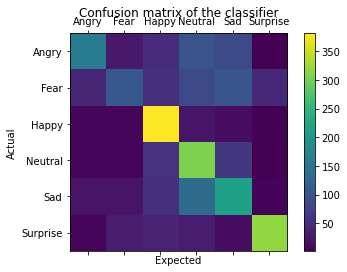

In [ ]:
cm = tf.math.confusion_matrix(labels=expect, predictions=actual)

labels = ['Angry','Fear','Happy','Neutral', 'Sad', 'Surprise']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Expected')
plt.ylabel('Actual')
plt.show()